## Observations and Insights 

# Three observations or inferences made from the data


1. The proportion of males versus female mice in the study was nearly equal. The proportion of male mice (50.7%) was only just greater than the proportion of female mice (49.3%).

2. In once instance (for mouse s185), the Capomulin treatment reduced the mouse's tumor volume by about 50%. 

3. For mice treated with Capomulin, final tumor volume correlated strongly (r=0.84) with mouse weight. This means that bigger mice receiving this treatment are lkely to have larger final tumor volumes.


In [319]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset (on 'Mouse ID')

mouse_study_merged_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study_merged_df.head(11)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [320]:
# Checking the number of mice.
num_mice_df = mouse_study_merged_df['Mouse ID'].nunique()
num_mice_df

249

In [321]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicaterows_mice_time_df = mouse_study_merged_df[mouse_study_merged_df.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicated rows based on Mouse ID and Timepoint columns are: ", duplicaterows_mice_time_df, sep='\n')

Duplicated rows based on Mouse ID and Timepoint columns are: 
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [322]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicaterows_mice_df = mouse_study_merged_df[mouse_study_merged_df.duplicated(['Mouse ID'])]
print("Duplicated rows based on the Mouse ID column are: ", duplicaterows_mice_df, sep='\n')

Duplicated rows based on the Mouse ID column are: 
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
5        k403     Ramicane  Male          21          16         25   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
1              38.825898                 0  
2     

In [323]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_study_df = mouse_study_merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [324]:
# Checking the number of mice in the clean DataFrame.

num_clean_mice_df = clean_mouse_study_df['Mouse ID'].nunique()
num_clean_mice_df

249

## Summary Statistics

In [325]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

drug_regimen_df = clean_mouse_study_df.groupby(['Drug Regimen'])
# drug_regimen_df.median()

## mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean_df = drug_regimen_df['Tumor Volume (mm3)'].mean()
# tumor_mean_df
tumor_median_df = drug_regimen_df['Tumor Volume (mm3)'].median()
# tumor_median_df
tumor_variance_df = drug_regimen_df['Tumor Volume (mm3)'].var()
# tumor_variance_df
tumor_std_dev_df = drug_regimen_df['Tumor Volume (mm3)'].std()
# tumor_std_dev_df
tumor_sem_df = drug_regimen_df['Tumor Volume (mm3)'].sem()
# tumor_sem_df

## Assemble the resulting series into a single summary dataframe.

stats_summary_tumor_vol_df = pd.DataFrame({"Mean (tumor vol)" : tumor_mean_df, "Median (tumor vol)" : tumor_median_df,
                                 "Variance (tumor vol)" : tumor_variance_df, "Standard Deviation (tumor vol)" : tumor_std_dev_df,
                                "Std Error of Mean (tumor vol)" : tumor_sem_df})
stats_summary_tumor_vol_df


,Mean (tumor vol),Median (tumor vol),Variance (tumor vol),Standard Deviation (tumor vol),Std Error of Mean (tumor vol)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [326]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tumor_vol_df = drug_regimen_df['Tumor Volume (mm3)']
# tumor_vol_df.mean()
agg_tumor_vol_stats_df = tumor_vol_df.agg(['mean', 'median', 'var', 'std', 'sem'])
agg_tumor_vol_stats_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [327]:
## Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Put drug regimen and number of timepoints into a dataframe and reset the index so drug regimen is in a column
timepoints_df = drug_regimen_df['Timepoint']
total_timepoints_df = timepoints_df.count()

timepoints_per_regimen_df = pd.DataFrame(total_timepoints_df)
timepoints_per_regimen_df

drug_regimen_timepoints_df = timepoints_per_regimen_df.reset_index()
drug_regimen_timepoints_df

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


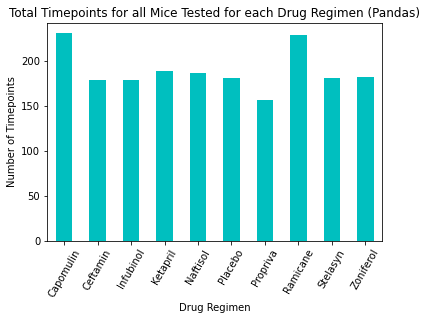

In [328]:
## Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen_timepoints_df.plot(kind="bar", x="Drug Regimen", y="Timepoint", rot=60, color='c',
                                                  title="Total Timepoints for all Mice Tested for each Drug Regimen (Pandas)",
                                                  legend="", ylabel="Number of Timepoints");


TypeError: 'str' object is not callable

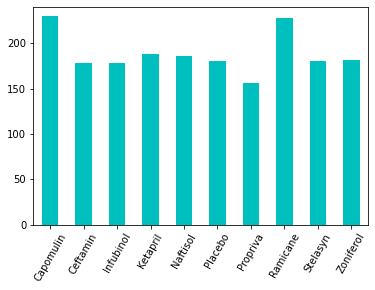

In [292]:
## Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(drug_regimen_timepoints_df))
ticklocations = [value for value in x_axis]

# Set plot parameters
plt.figure(figsize=(6,4))

plt.bar(x_axis, drug_regimen_timepoints_df["Timepoint"], width=0.5, color='c', alpha=1, align="center")
plt.xticks(ticklocations, drug_regimen_timepoints_df["Drug Regimen"], rotation="60")

# Set x and y limits
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(drug_regimen_timepoints_df["Timepoint"])+10)

# Set a title and labels
plt.title("Total Timepoints for all Mice Tested for each Drug Regimen (Pyplot)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints");

In [293]:
## Generate a pie plot showing the distribution of female versus male mice

# Put male and female count data into a dataframe and reset the index
male_fem_df = clean_mouse_study_df.groupby('Sex')
sex_count_df = male_fem_df.count()
mvf_df = sex_count_df['Mouse ID']
distrib_mvf_df = pd.DataFrame(mvf_df)
male_female_df = distrib_mvf_df.reset_index()
male_female_df

,Sex,Mouse ID
0,Female,930
1,Male,958


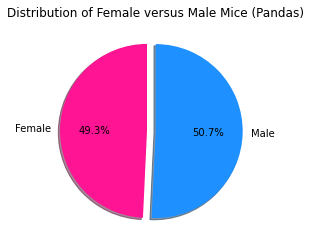

In [294]:
## Generate a pie plot showing the distribution of female versus male mice using Pandas

pandas_pie_plot = male_female_df.plot(kind="pie", y='Mouse ID', explode = (0.1, 0), labels = (male_female_df["Sex"]),
                                      colors = ["deeppink", "dodgerblue"], autopct="%1.1f%%", shadow=True, startangle=90, 
                                      title=("Distribution of Female versus Male Mice (Pandas)"), ylabel=(""), legend=(""))

TypeError: 'str' object is not callable

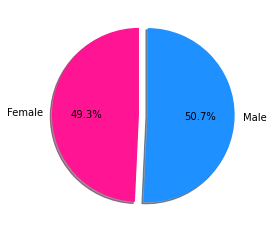

In [295]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot

# Set pie chart labels
labels = (male_female_df["Sex"])

# Set the value of each section of the pie chart
sizes = (male_female_df["Mouse ID"])

# Set the colours of each section of the pie chart
colors = ["deeppink", "dodgerblue"]

# Separate the sections of the pie chart
explode = (0.1, 0)

# Plot the pie chart
plt.pie(sizes, explode=explode, labels = labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Distribution of Female versus Male Mice (Pyplot)");

## Quartiles, Outliers and Boxplots

In [296]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
each_mouse_df = clean_mouse_study_df.groupby("Mouse ID")

max_timepoint_mouse_df = pd.DataFrame(each_mouse_df['Timepoint'].max())
max_timepoint_mouse_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

clean_mouse_indexed_df = clean_mouse_study_df.set_index('Mouse ID')
clean_mouse_indexed_df

tumor_vol_max_timepoint_df = clean_mouse_indexed_df.merge(max_timepoint_mouse_df, on=['Mouse ID','Timepoint'])
tumor_vol_max_timepoint_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,45,22.050126,1
s185,Capomulin,Female,3,17,45,23.343598,1
x401,Capomulin,Female,16,15,45,28.484033,0
m601,Capomulin,Male,22,17,45,28.430964,1
g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...
z314,Stelasyn,Female,21,28,5,45.934712,0
z435,Propriva,Female,12,26,10,48.710661,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [297]:
tumor_timepoint_reindexed_df = tumor_vol_max_timepoint_df.reset_index()
tumor_timepoint_reindexed_df
tumor_timepoint_soted_df = tumor_timepoint_reindexed_df.sort_values('Drug Regimen')
tumor_timepoint_soted_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,b742,Capomulin,Male,7,21,45,38.939633,0
45,i557,Capomulin,Female,1,24,45,47.685963,1
40,r944,Capomulin,Male,12,25,45,41.581521,2
39,l509,Capomulin,Male,17,21,45,41.483008,3
38,s710,Capomulin,Female,1,23,45,40.728578,1
...,...,...,...,...,...,...,...,...
84,d133,Zoniferol,Male,5,30,0,45.000000,0
154,n967,Zoniferol,Male,11,27,15,49.825004,1
85,d164,Zoniferol,Male,21,28,10,47.474645,1
143,m331,Zoniferol,Female,19,26,15,52.110088,1


In [298]:
# Select the following treatments only: Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = tumor_timepoint_soted_df.loc[tumor_timepoint_soted_df['Drug Regimen'] == "Capomulin"]
Ramicane_df = tumor_timepoint_soted_df.loc[tumor_timepoint_soted_df['Drug Regimen'] == "Ramicane"]
Infubinol_df = tumor_timepoint_soted_df.loc[tumor_timepoint_soted_df['Drug Regimen'] == "Infubinol"]
Ceftamin_df = tumor_timepoint_soted_df.loc[tumor_timepoint_soted_df['Drug Regimen'] == "Ceftamin"]

selected_drugs_df = pd.concat([Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df])
selected_drugs_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,b742,Capomulin,Male,7,21,45,38.939633,0
45,i557,Capomulin,Female,1,24,45,47.685963,1
40,r944,Capomulin,Male,12,25,45,41.581521,2
39,l509,Capomulin,Male,17,21,45,41.483008,3
38,s710,Capomulin,Female,1,23,45,40.728578,1
...,...,...,...,...,...,...,...,...
136,l661,Ceftamin,Male,18,26,45,59.851956,3
228,x226,Ceftamin,Male,23,28,0,45.000000,0
97,f436,Ceftamin,Female,3,25,15,48.722078,2
242,y865,Ceftamin,Male,23,26,45,64.729837,3


In [299]:
# Create empty list to fill with tumor vol data (for plotting)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Put treatments into a list for for loop (and later for plot labels)
tumor_lists = selected_drugs_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(treatments_list)
tumor_volumes = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]

In [300]:
## Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Capomulin IQR and outliers using upper and lower bounds
Cap_vols = Capomulin_df['Tumor Volume (mm3)']
Cap_quartiles = Cap_vols.quantile([.25,.5,.75])
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]
Cap_iqr = Cap_upperq - Cap_lowerq

print(f"The lower quartile of Capomulin tumor volume is: {Cap_lowerq}")
print(f"The upper quartile of Capomulin tumor volume is: {Cap_upperq}")
print(f"The interquartile range of Capomulin tumor volume is: {Cap_iqr}")
print(f"The median of Capomulin tumor volume is: {Cap_quartiles[0.5]}")
print('\n')

Cap_lower_bound = Cap_lowerq - (1.5*iqr)
Cap_upper_bound = Cap_upperq + (1.5*iqr)
print(f"Values below {Cap_lower_bound} could be outliers")
print(f"Values above {Cap_upper_bound} could be outliers")
print('\n')

Cap_outlier_lower = Capomulin_df.loc[(Capomulin_df["Tumor Volume (mm3)"] < Cap_lower_bound)] 
Cap_outlier_upper = Capomulin_df.loc[(Capomulin_df["Tumor Volume (mm3)"] > Cap_upper_bound)]
print("LOWER BOUND OUTLIER")
print(f"Data from the following mouse/mice in the lower tumor volume range could be outliter(s): ", 
      Cap_outlier_lower['Mouse ID'], sep='\n')
print('\n')
print("UPPER BOUND OUTLIER")
print(f"Data from the following mouse/mice in the upper tumor volume range could be outliter(s): ", 
      Cap_outlier_upper['Mouse ID'], sep='\n');

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The median of Capomulin tumor volume is: 38.125164399999996


Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers


LOWER BOUND OUTLIER
Data from the following mouse/mice in the lower tumor volume range could be outliter(s): 
Series([], Name: Mouse ID, dtype: object)


UPPER BOUND OUTLIER
Data from the following mouse/mice in the upper tumor volume range could be outliter(s): 
Series([], Name: Mouse ID, dtype: object)


In [301]:
# Ramicane IQR and outliers using upper and lower bounds
Ram_vols = Ramicane_df['Tumor Volume (mm3)']
Ram_quartiles = Ram_vols.quantile([.25,.5,.75])
Ram_lowerq = Ram_quartiles[0.25]
Ram_upperq = Ram_quartiles[0.75]
Ram_iqr = Ram_upperq - Ram_lowerq

print(f"The lower quartile of Ramicane tumor volume is: {Ram_lowerq}")
print(f"The upper quartile of Ramicane tumor volume is: {Ram_upperq}")
print(f"The interquartile range of Ramicane tumor volume is: {Ram_iqr}")
print(f"The median of Ramicane tumor volume is: {Ram_quartiles[0.5]}")
print('\n')

Ram_lower_bound = Ram_lowerq - (1.5*iqr)
Ram_upper_bound = Ram_upperq + (1.5*iqr)
print(f"Values below {Ram_lower_bound} could be outliers")
print(f"Values above {Ram_upper_bound} could be outliers")
print('\n')

Ram_outlier_lower = Ramicane_df.loc[(Ramicane_df["Tumor Volume (mm3)"] < Ram_lower_bound)] 
Ram_outlier_upper = Ramicane_df.loc[(Ramicane_df["Tumor Volume (mm3)"] > Ram_upper_bound)]
print("LOWER BOUND OUTLIER")
print(f"Data from the following mouse/mice in the lower tumor volume range could be outliter(s): ", 
      Ram_outlier_lower['Mouse ID'], sep='\n')
print('\n')
print("UPPER BOUND OUTLIER")
print(f"Data from the following mouse/mice in the upper tumor volume range could be outliter(s): ", 
      Ram_outlier_upper['Mouse ID'], sep='\n');

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The median of Ramicane tumor volume is: 36.56165229


Values below 19.887674359999995 could be outliers
Values above 52.33180146000001 could be outliers


LOWER BOUND OUTLIER
Data from the following mouse/mice in the lower tumor volume range could be outliter(s): 
Series([], Name: Mouse ID, dtype: object)


UPPER BOUND OUTLIER
Data from the following mouse/mice in the upper tumor volume range could be outliter(s): 
Series([], Name: Mouse ID, dtype: object)


In [302]:
# Infubinol IQR and outliers using upper and lower bounds
Inf_vols = Infubinol_df['Tumor Volume (mm3)']
Inf_quartiles = Inf_vols.quantile([.25,.5,.75])
Inf_lowerq = Inf_quartiles[0.25]
Inf_upperq = Inf_quartiles[0.75]
Inf_iqr = Inf_upperq - Inf_lowerq

print(f"The lower quartile of Infubinol tumor volume is: {Inf_lowerq}")
print(f"The upper quartile of Infubinol tumor volume is: {Inf_upperq}")
print(f"The interquartile range of Infubinol tumor volume is: {Inf_iqr}")
print(f"The median of Infubinol tumor volume is: {Inf_quartiles[0.5]}")
print('\n')

Inf_lower_bound = Inf_lowerq - (1.5*iqr)
Inf_upper_bound = Inf_upperq + (1.5*iqr)
print(f"Values below {Inf_lower_bound} could be outliers")
print(f"Values above {Inf_upper_bound} could be outliers")
print('\n')

Inf_outlier_lower = Infubinol_df.loc[(Infubinol_df["Tumor Volume (mm3)"] < Inf_lower_bound)] 
Inf_outlier_upper = Infubinol_df.loc[(Infubinol_df["Tumor Volume (mm3)"] > Inf_upper_bound)]
print("LOWER BOUND OUTLIER")
print(f"Data from the following mouse/mice in the lower tumor volume range could be outliter(s): ", 
      Inf_outlier_lower['Mouse ID'], sep='\n')
print('\n')
print("UPPER BOUND OUTLIER")
print(f"Data from the following mouse/mice in the upper tumor volume range could be outliter(s): ", 
      Inf_outlier_upper['Mouse ID'], sep='\n');

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The median of Infubinol tumor volume is: 60.16518046


Values below 42.375812499999995 could be outliers
Values above 77.19853804 could be outliers


LOWER BOUND OUTLIER
Data from the following mouse/mice in the lower tumor volume range could be outliter(s): 
74    c326
Name: Mouse ID, dtype: object


UPPER BOUND OUTLIER
Data from the following mouse/mice in the upper tumor volume range could be outliter(s): 
Series([], Name: Mouse ID, dtype: object)


In [303]:
# Ceftamin IQR and outliers using upper and lower bounds
Cef_vols = Ceftamin_df['Tumor Volume (mm3)']
Cef_quartiles = Cef_vols.quantile([.25,.5,.75])
Cef_lowerq = Cef_quartiles[0.25]
Cef_upperq = Cef_quartiles[0.75]
Cef_iqr = Cef_upperq - Cef_lowerq

print(f"The lower quartile of Ceftamin tumor volume is: {Cef_lowerq}")
print(f"The upper quartile of Ceftamin tumor volume is: {Cef_upperq}")
print(f"The interquartile range of Ceftamin tumor volume is: {Cef_iqr}")
print(f"The median of Ceftamin tumor volume is: {Cef_quartiles[0.5]}")
print('\n')

Cef_lower_bound = Cef_lowerq - (1.5*iqr)
Cef_upper_bound = Cef_upperq + (1.5*iqr)
print(f"Values below {Cef_lower_bound} could be outliers")
print(f"Values above {Cef_upper_bound} could be outliers")
print('\n')

Cef_outlier_lower = Ceftamin_df.loc[(Ceftamin_df["Tumor Volume (mm3)"] < Cef_lower_bound)] 
Cef_outlier_upper = Ceftamin_df.loc[(Ceftamin_df["Tumor Volume (mm3)"] > Cef_upper_bound)]
print("LOWER BOUND OUTLIER")
print(f"Data from the following mouse/mice in the lower tumor volume range could be outliter(s): ", 
      Cef_outlier_lower['Mouse ID'], sep='\n')
print('\n')
print("UPPER BOUND OUTLIER")
print(f"Data from the following mouse/mice in the higher tumor volume range could be outliter(s): ", 
      Cef_outlier_upper['Mouse ID'], sep='\n');

The lower quartile of Ceftamin tumor volume is: 48.72207785
The upper quartile of Ceftamin tumor volume is: 64.29983003
The interquartile range of Ceftamin tumor volume is: 15.577752179999997
The median of Ceftamin tumor volume is: 59.85195552


Values below 37.04928265999999 could be outliers
Values above 75.97262522 could be outliers


LOWER BOUND OUTLIER
Data from the following mouse/mice in the lower tumor volume range could be outliter(s): 
Series([], Name: Mouse ID, dtype: object)


UPPER BOUND OUTLIER
Data from the following mouse/mice in the higher tumor volume range could be outliter(s): 
Series([], Name: Mouse ID, dtype: object)


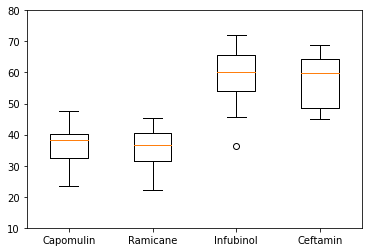

In [304]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volumes, labels=treatments_list)
plt.ylim(10,80)
plt.show()

## Line and Scatter Plots

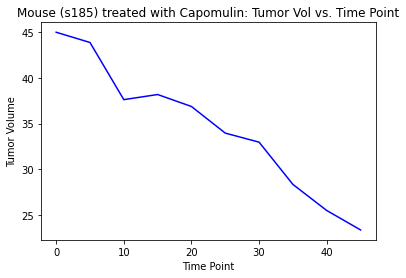

In [305]:
## Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Create table for a mouse treated with Capomulin
Capomulin_data_df = clean_mouse_study_df.loc[clean_mouse_study_df['Drug Regimen'] == "Capomulin"]
mouse_s185_df = Capomulin_data_df.loc[Capomulin_data_df['Mouse ID'] == "s185"]

# Generate a line plot of tumor volume vs. time point
mouse_s185_df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", color='b',
                                                  title="Mouse (s185) treated with Capomulin: Tumor Vol vs. Time Point",
                                                  legend="", xlabel="Time Point", ylabel="Tumor Volume");

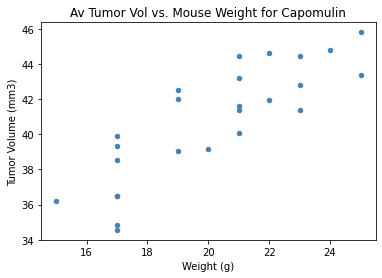

In [306]:
## Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Groupby Mouse ID, get the mean of values and set as a DataFrame
Capomulin_avtumor_data_df = Capomulin_data_df.groupby("Mouse ID")
Capomulin_avtumor_data_df.mean()
Capomulin_mean_avtumor_df = pd.DataFrame(Capomulin_avtumor_data_df.mean())
Capomulin_mean_avtumor_df

# Generate a scatter plot of average tumor volume vs. mouse weight
Capomulin_mean_avtumor_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", color='steelblue', 
                       title="Av Tumor Vol vs. Mouse Weight for Capomulin", legend="");

## Correlation and Regression

In [307]:
## Calculate the correlation coefficient and linear regression model 
## for mouse weight and average tumor volume for the Capomulin regimen

# Pearson correlation coefficient for mouse weight and average tumor volume
weight = Capomulin_mean_avtumor_df.iloc[:,1]
avtumor_vol = Capomulin_mean_avtumor_df.iloc[:,3]
correlation = st.pearsonr(weight, avtumor_vol)
print(f"The correlation efficient betwen mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation efficient betwen mouse weight and average tumor volume is 0.84


TypeError: 'str' object is not callable

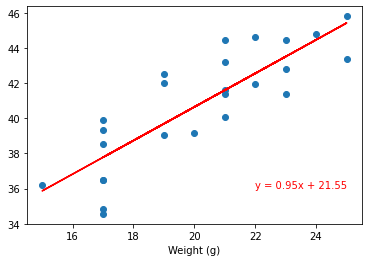

In [308]:
# Linear regression model for mouse weight and average tumor volume

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avtumor_vol)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

regress_values = (slope * weight) + intercept

plt.scatter(Capomulin_mean_avtumor_df.iloc[:,1], Capomulin_mean_avtumor_df.iloc[:,3])

plt.plot(weight, regress_values,"r-")

plt.annotate(line_eq,(22,36),fontsize=10,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Av Tumor Vol vs. Mouse Weight for Capomulin')
plt.show()